<a href="https://colab.research.google.com/github/jamesmattluyon/CPE-AIDL/blob/main/58026_LabNo.01_BrenanAndFriends/58026_LabNo_01_BrenanAndFriends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratory Activity

1. Perform Descriptive Analytics with the iris dataset.
2. Design and implement an experiment for a classification routine with the iris dataset.
3. Try at least nine (3x3 comparison) different combinations of unique MLP architectures with each with varying neurons, layers, and learning rates while standardizing the number of epochs for training.
4. Perform an analysis with the training results of the nine combinations.


###Part 1: Iris Dataset
> The dataset has three classes, each with 50 instances, each referring to a different species of iris plant. One class is linearly separable from the other two; however, the subsequent two are not linearly separable.

Dataset: https://archive.ics.uci.edu/ml/datasets/iris

###Part 2: Descriptive Analytics with Iris Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import scatter_matrix

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Brenan and Friends/2nd Sem, 2021-2022/AIDA 3 - Deep Learning/58026_LabNo.01_BrenanAndFriends/Iris.csv')

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data = data.drop(columns = ['Id'])
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

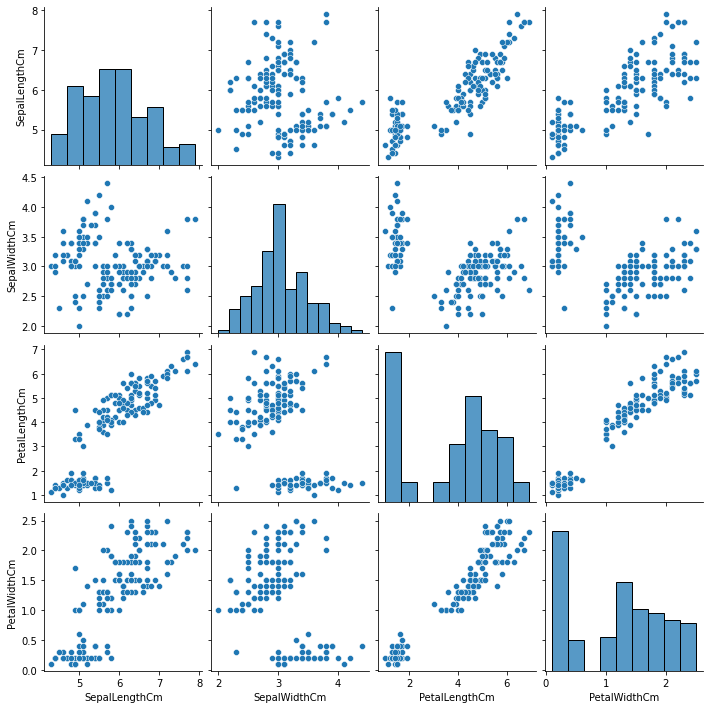

In [ ]:
sns.pairplot(data)

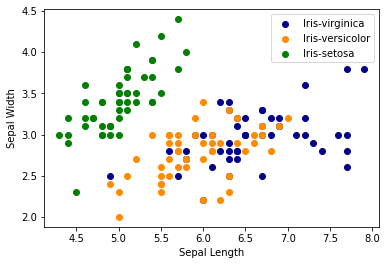

In [ ]:
iris = ['Iris-virginica','Iris-versicolor','Iris-setosa']
colors = ['darkblue', 'darkorange', 'green']

for i in range(3):
    x = data[data['Species'] == iris[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=iris[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

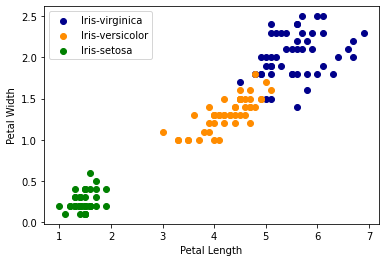

In [ ]:
for i in range(3):
    x = data[data['Species'] == iris[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=iris[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

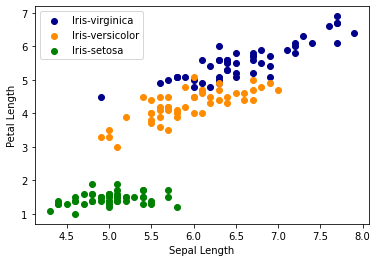

In [ ]:
for i in range(3):
    x = data[data['Species'] == iris[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=iris[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

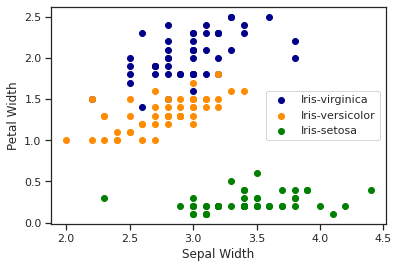

In [ ]:
for i in range(3):
    x = data[data['Species'] == iris[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=iris[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


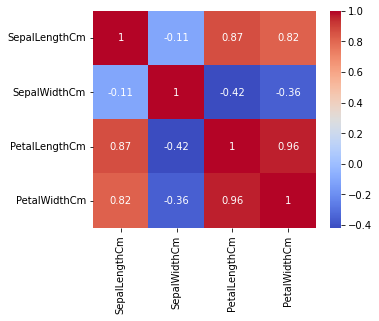

In [ ]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation, annot=True, ax=ax, cmap = 'coolwarm')

The figure above shows the correlation between the four (4) attributes of the Iris coming from the .csv file. As we can see, there is a strong correlation from Sepal length to the Petal length and width but there is a weak correlation from sepal width to the Petal length, width and sepal length. 

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris() 

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris_data['data_module']

'sklearn.datasets.data'

In [ ]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
x = iris_data.data
y = iris_data.target
z = iris_data.target_names
print(iris_data.feature_names)
print(x[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2]


The code above shows that we have imported the Iris data set from the internet to get the .csv file of the data set and next is to create a descriptive analytics to the data set to check the keys and features.

###Part 3: MLP in Iris Dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_text, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'],)

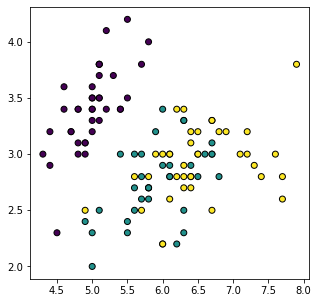

In [ ]:

plt.figure(figsize=(5,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k');

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [ ]:
model= Sequential()
model.add(Dense(100,input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.2265 - accuracy: 0.4952
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.0793 - accuracy: 0.5714
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9854 - accuracy: 0.3333
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9456 - accuracy: 0.5619
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9167 - accuracy: 0.6476
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8882 - accuracy: 0.6476
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8557 - accuracy: 0.6095
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.4952
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.8002 - accuracy: 0.5524
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.7700 - accuracy: 0.7429
Epoch 11/20
4/4 [======================

The code above shows the setting up of the MLP using sequential technique and the researchers set the learning rate of the model by “0.3” with 20 epochs. there are 4 input layers representing the 4 attributes of the Iris and there are 100 dense layers that uses “relu” as an activation function and there are 3 dense layer that uses “softmax” as an activation function. 

In [ ]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.5113 - accuracy: 0.9111


[0.5113250613212585, 0.9111111164093018]

In [ ]:
pred=model.predict(x_test[:10])
print(pred)

[[0.05870747 0.34707665 0.5942158 ]
 [0.05028145 0.36412993 0.5855887 ]
 [0.8124811  0.15727098 0.03024789]
 [0.13077518 0.46925804 0.39996675]
 [0.7366142  0.213689   0.04969667]
 [0.80609536 0.16077942 0.03312524]
 [0.7569164  0.1986326  0.044451  ]
 [0.05637634 0.3438323  0.59979135]
 [0.1048121  0.45060614 0.44458175]
 [0.05258056 0.33737707 0.61004233]]


In [ ]:
p=np.argmax(pred, axis=1)
print(p)
print(y_test[:10])

[2 2 0 1 0 0 0 2 1 2]
[2 2 0 1 0 0 0 2 1 2]


In [ ]:
for i in p:
  print("Predicted-Class: {},   Name: {}".format(i,z[i]))

Predicted-Class: 2,   Name: virginica
Predicted-Class: 2,   Name: virginica
Predicted-Class: 0,   Name: setosa
Predicted-Class: 1,   Name: versicolor
Predicted-Class: 0,   Name: setosa
Predicted-Class: 0,   Name: setosa
Predicted-Class: 0,   Name: setosa
Predicted-Class: 2,   Name: virginica
Predicted-Class: 1,   Name: versicolor
Predicted-Class: 2,   Name: virginica


In [ ]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon
        
    def run(self, gradient_fn, x, y, params):
        norms = np.array([np.inf])
        t = 1
        while np.any(norms > self.epsilon) and t < self.max_iters:
            grad = gradient_fn(x, y, params)
            for p in range(len(params)):
                params[p] -= self.learning_rate * grad[p]
            t += 1
            norms = np.array([np.linalg.norm(g) for g in grad])
        return params

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))

In [ ]:
class MLP:
    def __init__(self, M = 64):
        self.M = M
            
    def fit(self, x, y, optimizer):
        N,D = x.shape
        def gradient(x, y, params):
            v, w = params
            z = logistic(np.dot(x, v)) #N x M
            yh = logistic(np.dot(z, w))#N
            dy = yh - y #N
            dw = np.dot(z.T, dy)/N #M
            dz = np.outer(dy, w) #N x M
            dv = np.dot(x.T, dz * z * (1 - z))/N #D x M
            dparams = [dv, dw]
            return dparams
        
        w = np.random.randn(self.M) * .01
        v = np.random.randn(D,self.M) * .01
        params0 = [v,w]
        self.params = optimizer.run(gradient, x, y, params0)
        return self
    
    def predict(self, x):
        v, w = self.params
        z = logistic(np.dot(x, v)) #N x M
        yh = logistic(np.dot(z, w))#N
        return yh

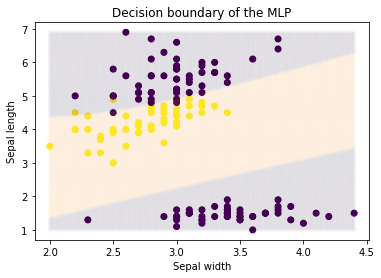

In [ ]:
from sklearn import datasets
dataset = datasets.load_iris()
x, y = dataset['data'][:,[1,2]], dataset['target']
y =  y == 1
model = MLP(M=32)
optimizer = GradientDescent(learning_rate=.1, max_iters=20000)
yh = model.fit(x, y, optimizer).predict(x) 
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
yh_all = model.predict(x_all) > .5
plt.scatter(x[:,0], x[:,1], c=y, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=yh_all, marker='.', alpha=.01)
plt.ylabel('Sepal length')
plt.xlabel('Sepal width')
plt.title('Decision boundary of the MLP')
plt.show()

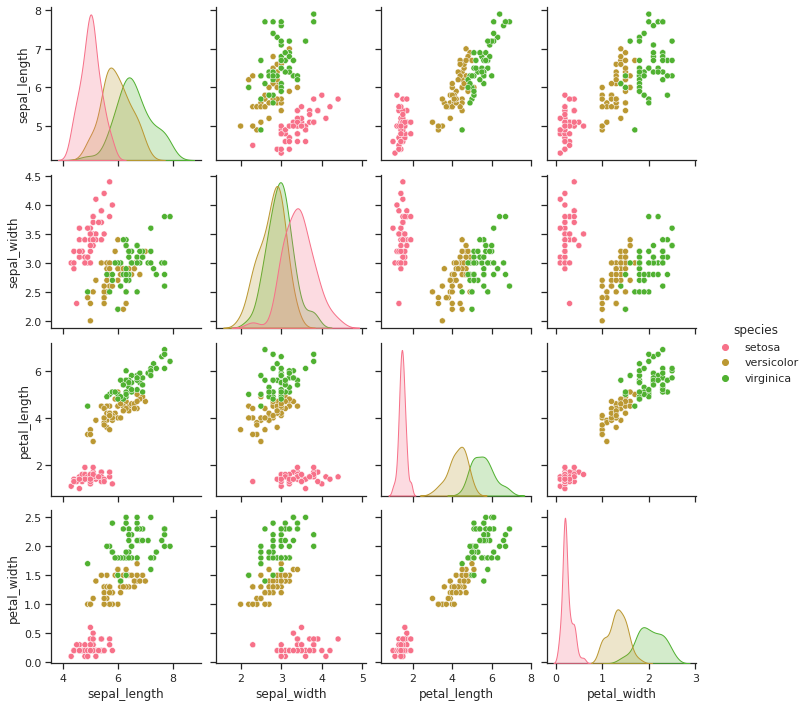

In [ ]:
df1 = sns.load_dataset("iris")
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df1.iloc[:,0:6], hue="species")

In [ ]:
X = df1.iloc[:,0:4].values
y = df1.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [ ]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
model = Sequential()
model.add(Dense(4,input_shape=(4,),activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


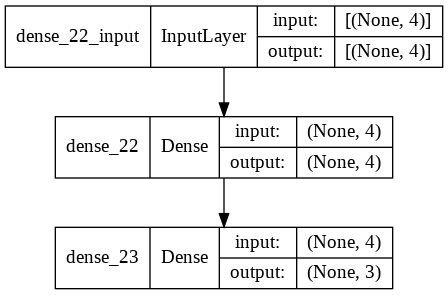

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')

In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1381 - accuracy: 0.4833
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9184 - accuracy: 0.6917
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.6917
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7327 - accuracy: 0.6917
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6058 - accuracy: 0.7083
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.8167
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8583
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3930 - accuracy: 0.9000
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3471 - accuracy: 0.9083
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.9583
Epoch 11/100
4/4 [===========

In [ ]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
